In [157]:
# Required Imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [158]:
# Load data

df = pd.read_csv("UsArrests.csv")
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## Exploring the Data

In [159]:
# Identify any missing values

df.isnull().sum()

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [160]:
# Identify data types

df.dtypes

City         object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [161]:
# Identify if there are any duplicated cities

dupe = df["City"].is_unique
print("All Cities displayed are unique: ", dupe)

All Cities displayed are unique:  True


In [162]:
# Replace index column with city

df.set_index("City")

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [163]:
# Describe statistical information using mean, standard deviation minimum and maximum values

stats = df.describe()
stats = stats.loc[["mean","std","min","max"]].transpose()
stats

,mean,std,min,max
Murder,7.788,4.355510,0.8,17.4
Assault,170.760,83.337661,45.0,337.0
UrbanPop,65.540,14.474763,32.0,91.0
Rape,21.232,9.366385,7.3,46.0


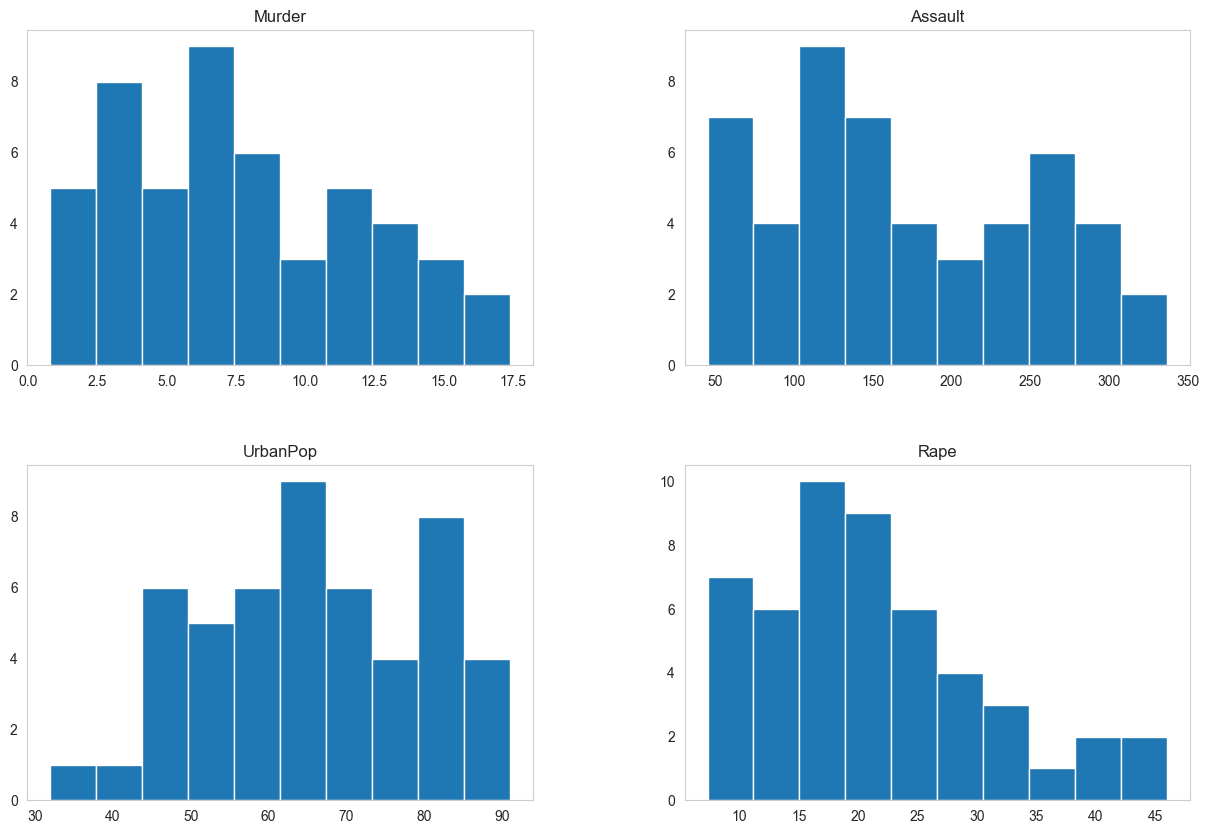

In [164]:
# Display histograms of the data

histograms = df.hist(grid = False, figsize=(15, 10))
plt.show()

## Correlation Analysis

In [165]:
# Obtain correlation from dataset

corr = df.corr()

C:\Users\chris\AppData\Local\Temp\ipykernel_32120\3852261371.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


C:\Users\chris\AppData\Local\Temp\ipykernel_32120\833596975.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ut=np.triu(np.ones(corr.shape)).astype(np.bool)


<AxesSubplot: >

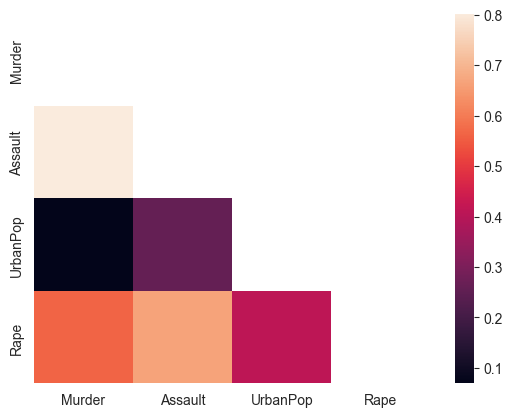

In [166]:
# print heatmap

ut=np.triu(np.ones(corr.shape)).astype(np.bool)
sns.heatmap(corr, fmt = ".1f", mask = ut)

From the plot above, variables that are positively correlated are pink, whereas the variables that are negatively correlated are dark blue / navy.
We can see that UrbanPop and Murder have a negative correlation and Assault and Murder have a positive correlation.

## PCA

In [167]:
# Drop city column 

pca_df = df.drop(["City"], axis = 1)

In [168]:
# Scale the data

x = StandardScaler().fit_transform(pca_df.values)

In [169]:
# Apply PCA to scaled data

pca = PCA(n_components = 4)

components = pca.fit_transform(x)

pca_dataframe = pd.DataFrame(components, index=df.index)

pca_dataframe.head()

,0,1,2,3
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996


C:\Users\chris\AppData\Local\Temp\ipykernel_32120\1890874157.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  shape = np.triu(np.ones(pca_corr.shape)).astype(np.bool)


<AxesSubplot: >

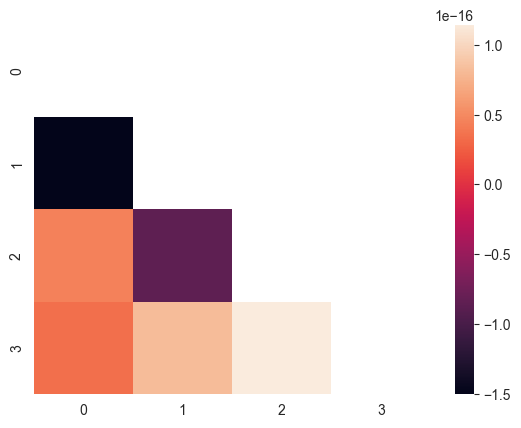

In [170]:
# Plot transformed data

pca_corr = pca_dataframe.corr()
shape = np.triu(np.ones(pca_corr.shape)).astype(np.bool)
sns.heatmap(pca_corr, fmt = '.1f', mask = shape)

# Cluster Analysis

## K-Means Clustering

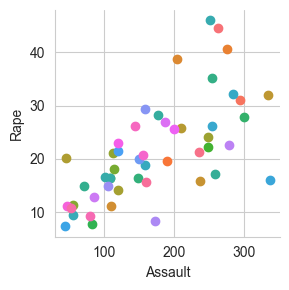

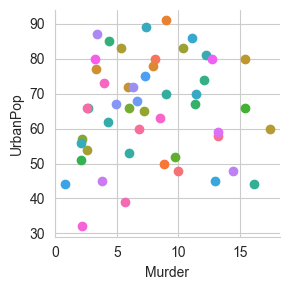

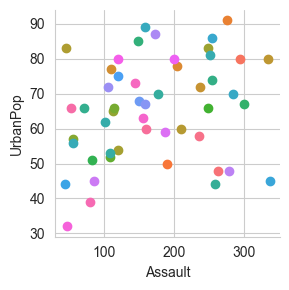

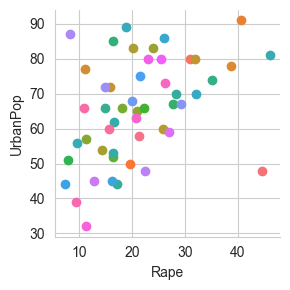

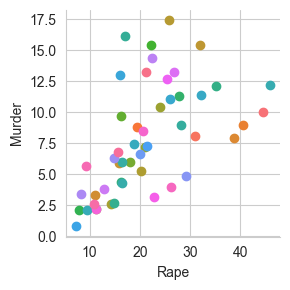

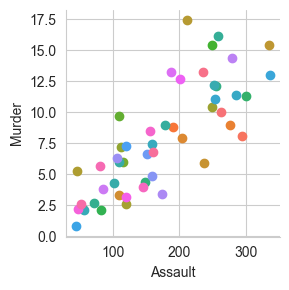

In [171]:
# Create graphs to identify most promising separating

sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "City", margin_titles = True).map(plt.scatter, 'Assault', 'Rape')
sns.FacetGrid(df, hue = "City", margin_titles = True).map(plt.scatter, 'Murder', 'UrbanPop')
sns.FacetGrid(df, hue = "City", margin_titles = True).map(plt.scatter, 'Assault', 'UrbanPop')
sns.FacetGrid(df, hue = "City", margin_titles = True).map(plt.scatter, 'Rape', 'UrbanPop')
sns.FacetGrid(df, hue = "City", margin_titles = True).map(plt.scatter, 'Rape', 'Murder')
sns.FacetGrid(df, hue = "City", margin_titles = True).map(plt.scatter, 'Assault', 'Murder')

Based on the graphs above, we shall use the Muder vs Assault graph to perform a K-Means cluster.

In [172]:
# Prepare the data

k = df[['Murder','Assault']].values.reshape(-1,2)
k.shape

(50, 2)

In [173]:
# Fit model KNN

kmeans = KMeans()
y_pred = kmeans.fit_predict(k)

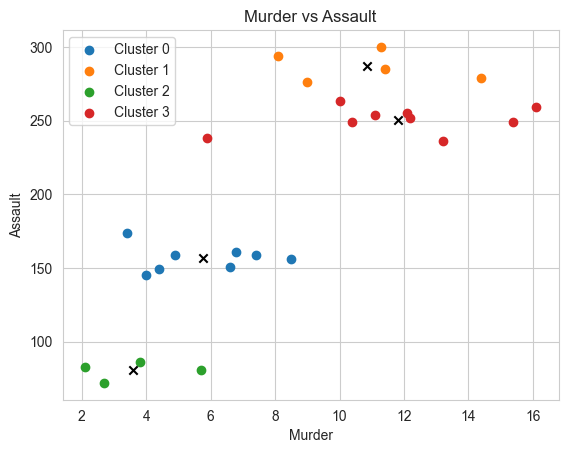

In [174]:
# Create scatter graph with size 4

for c in range(4):
    plt.scatter(k[y_pred == c, 0], k[y_pred == c,1], label = 'Cluster {}'.format(c))
    plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')

plt.title("Murder vs Assault")
plt.xlabel('Murder')
plt.ylabel("Assault")
plt.legend()
plt.show()

In [175]:
# acccuracy score of model

score_1 = silhouette_score(k, kmeans.labels_)
print(round(score_1, 3))

0.674


With the accuracy score above 0 and closer to 1, this means the accuracy for the K Means cluster is very good.

# Hierarchical Cluster

In [176]:
# Obtain and scale data

x = df[["Murder", "Assault"]].values
x = x.reshape(-1,2)
x.shape

(50, 2)

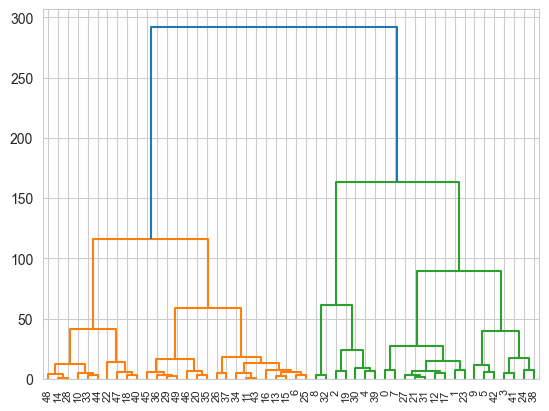

In [177]:
# Create a dendogram with complete linkage and euclidean

dend = dendrogram(linkage(x, method = 'complete', metric='euclidean'))

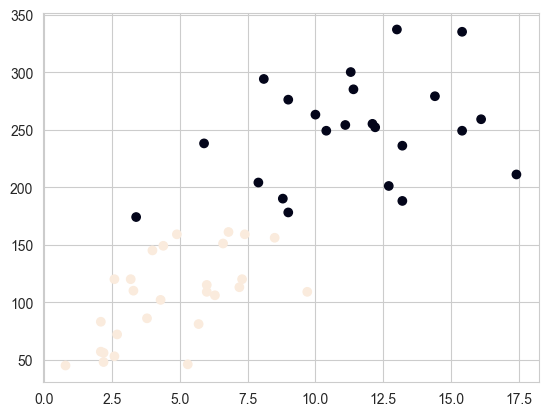

In [178]:
# Cluster and plot

cluster = AgglomerativeClustering(n_clusters = 2, linkage = 'complete', affinity = 'euclidean')
cluster.fit_predict(x)
plt.scatter(x[:,0], x[:,1], c = cluster.labels_)

In [179]:
# Silhouette score

score_2 = silhouette_score(x, cluster.labels_)
print(round(score_2, 3))

0.619


The accuracy score is above 0 and closer to 1, this means the accuracy for the cluster is very good.